# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     31.34
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           5.85e-08
Time:                        14:56:20   Log-Likelihood:                 351.29
No. Observations:                 244   AIC:                            -698.6
Df Residuals:                     242   BIC:                            -691.6
Df Model:                           1       

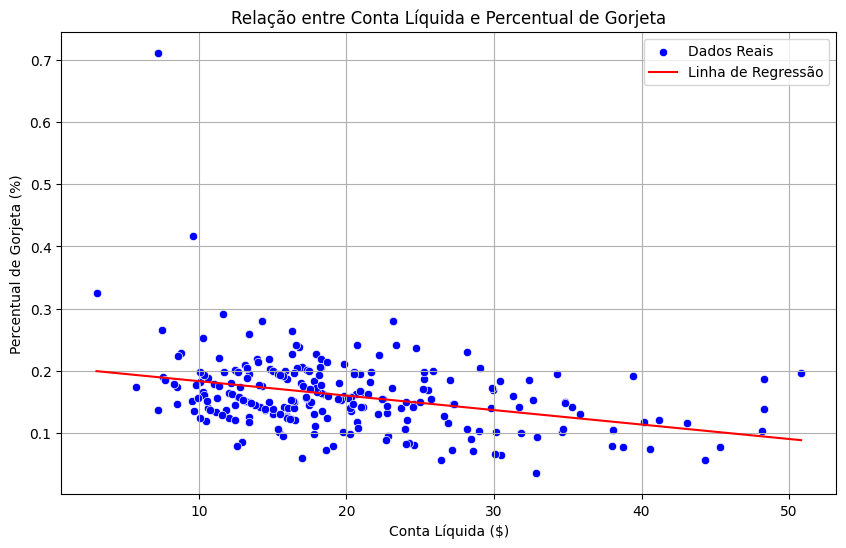

In [9]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar a base de dados
tips = sns.load_dataset('tips')
print(tips.head())

# Criar a variável 'net_bill' subtraindo outras taxas da conta (neste caso, apenas duplicando 'total_bill')
tips['net_bill'] = tips['total_bill']

# Criar a variável 'tip_pct' (percentual de gorjeta)
tips['tip_pct'] = tips['tip'] / tips['total_bill']

# Criar o modelo de regressão para porcentagem de gorjeta
X_net_bill = sm.add_constant(tips['net_bill'])
model_tip_pct = sm.OLS(tips['tip_pct'], X_net_bill).fit()

# Exibir o resumo do modelo
print(model_tip_pct.summary())

# Gráfico da relação entre 'net_bill' e 'tip_pct'
plt.figure(figsize=(10, 6))

# Plotar os dados reais
sns.scatterplot(x=tips['net_bill'], y=tips['tip_pct'], color='blue', label='Dados Reais')

# Plotar a linha de regressão
sns.lineplot(x=tips['net_bill'], y=model_tip_pct.predict(X_net_bill), color='red', label='Linha de Regressão')

plt.title('Relação entre Conta Líquida e Percentual de Gorjeta')
plt.xlabel('Conta Líquida ($)')
plt.ylabel('Percentual de Gorjeta (%)')
plt.legend()
plt.grid(True)
plt.show()

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     41.48
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           6.37e-10
Time:                        14:56:30   Log-Likelihood:                 355.73
No. Observations:                 244   AIC:                            -707.5
Df Residuals:                     242   BIC:                            -700.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3146      0.024     13.023   

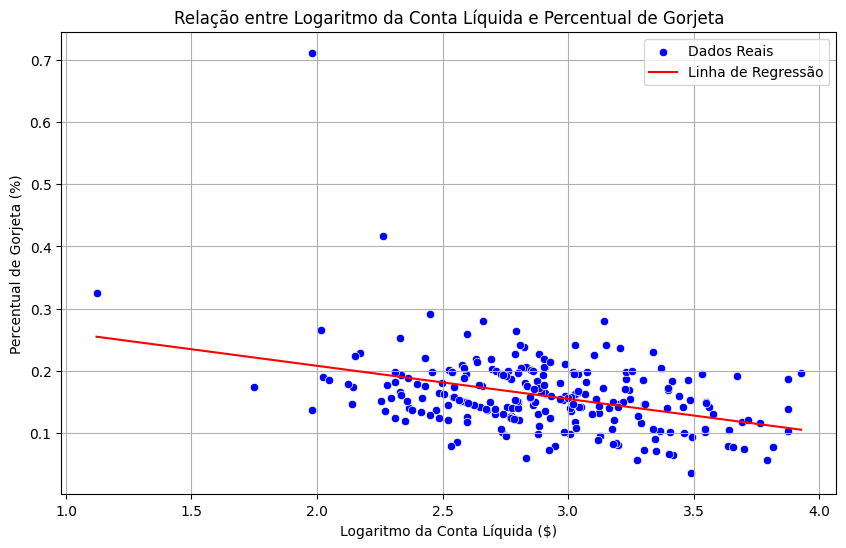

In [10]:
# Carregar a base de dados
tips = sns.load_dataset('tips')

# Criar a variável 'net_bill' e calcular o logaritmo de 'net_bill'
tips['net_bill'] = tips['total_bill']
tips['log_net_bill'] = np.log(tips['net_bill'])

# Criar a variável 'tip_pct' (percentual de gorjeta)
tips['tip_pct'] = tips['tip'] / tips['total_bill']

# Criar o modelo de regressão para tip_pct em função do logaritmo de net_bill
X_log_net_bill = sm.add_constant(tips['log_net_bill'])
model_tip_pct_log = sm.OLS(tips['tip_pct'], X_log_net_bill).fit()

# Exibir o resumo do modelo
print(model_tip_pct_log.summary())

# Printar os dados finais
print("\nDados Finais (tip_pct, net_bill, log_net_bill):")
print(tips[['tip_pct', 'net_bill', 'log_net_bill']].head())

# Gráfico da relação entre log(net_bill) e tip_pct
plt.figure(figsize=(10, 6))

# Plotar os dados reais
sns.scatterplot(x=tips['log_net_bill'], y=tips['tip_pct'], color='blue', label='Dados Reais')

# Plotar a linha de regressão
sns.lineplot(x=tips['log_net_bill'], y=model_tip_pct_log.predict(X_log_net_bill), color='red', label='Linha de Regressão')

plt.title('Relação entre Logaritmo da Conta Líquida e Percentual de Gorjeta')
plt.xlabel('Logaritmo da Conta Líquida ($)')
plt.ylabel('Percentual de Gorjeta (%)')
plt.legend()
plt.grid(True)
plt.show()

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     19.65
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           1.24e-08
Time:                        14:57:44   Log-Likelihood:                 354.86
No. Observations:                 244   AIC:                            -703.7
Df Residuals:                     241   BIC:                            -693.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2525      0.019  

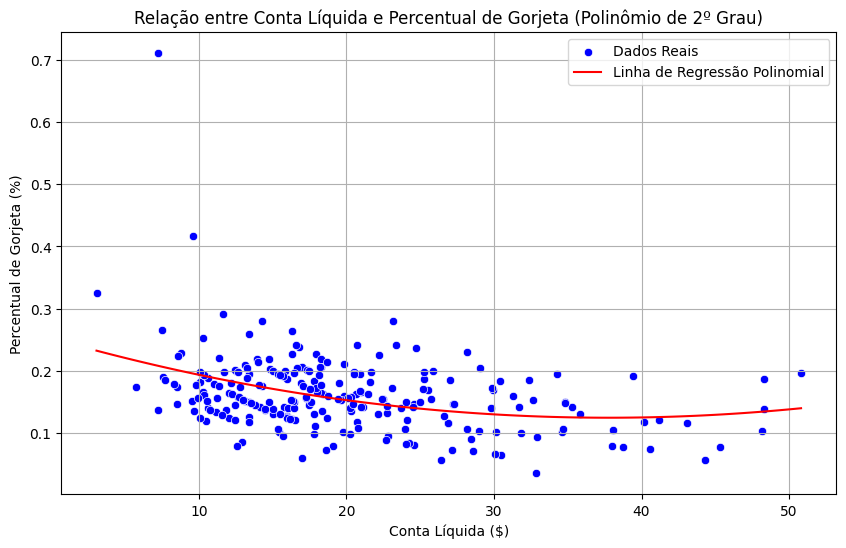

In [11]:
# Carregar a base de dados
tips = sns.load_dataset('tips')

# Criar a variável 'net_bill'
tips['net_bill'] = tips['total_bill']

# Criar a variável 'tip_pct' (percentual de gorjeta)
tips['tip_pct'] = tips['tip'] / tips['total_bill']

# Criar as variáveis para o polinômio de segundo grau (net_bill^2)
tips['net_bill_squared'] = tips['net_bill'] ** 2

# Criar o modelo de regressão para tip_pct em função de net_bill e net_bill^2 (polinômio de segundo grau)
X_poly = sm.add_constant(tips[['net_bill', 'net_bill_squared']])
model_tip_pct_poly = sm.OLS(tips['tip_pct'], X_poly).fit()

# Exibir o resumo do modelo
print(model_tip_pct_poly.summary())

# Printar os dados finais (tip_pct, net_bill, net_bill_squared)
print("\nDados Finais (tip_pct, net_bill, net_bill_squared):")
print(tips[['tip_pct', 'net_bill', 'net_bill_squared']].head())

# Gráfico da relação entre net_bill e tip_pct com o ajuste polinomial
plt.figure(figsize=(10, 6))

# Plotar os dados reais
sns.scatterplot(x=tips['net_bill'], y=tips['tip_pct'], color='blue', label='Dados Reais')

# Plotar a linha de regressão polinomial
x_range = np.linspace(tips['net_bill'].min(), tips['net_bill'].max(), 100)
y_poly_pred = model_tip_pct_poly.predict(sm.add_constant(pd.DataFrame({'net_bill': x_range, 'net_bill_squared': x_range**2})))

sns.lineplot(x=x_range, y=y_poly_pred, color='red', label='Linha de Regressão Polinomial')

plt.title('Relação entre Conta Líquida e Percentual de Gorjeta (Polinômio de 2º Grau)')
plt.xlabel('Conta Líquida ($)')
plt.ylabel('Percentual de Gorjeta (%)')
plt.legend()
plt.grid(True)
plt.show()

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     42.85
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           3.50e-10
Time:                        14:58:46   Log-Likelihood:                -69.853
No. Observations:                 244   AIC:                             143.7
Df Residuals:                     242   BIC:                             150.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5858      0.051    -31.365      0.0

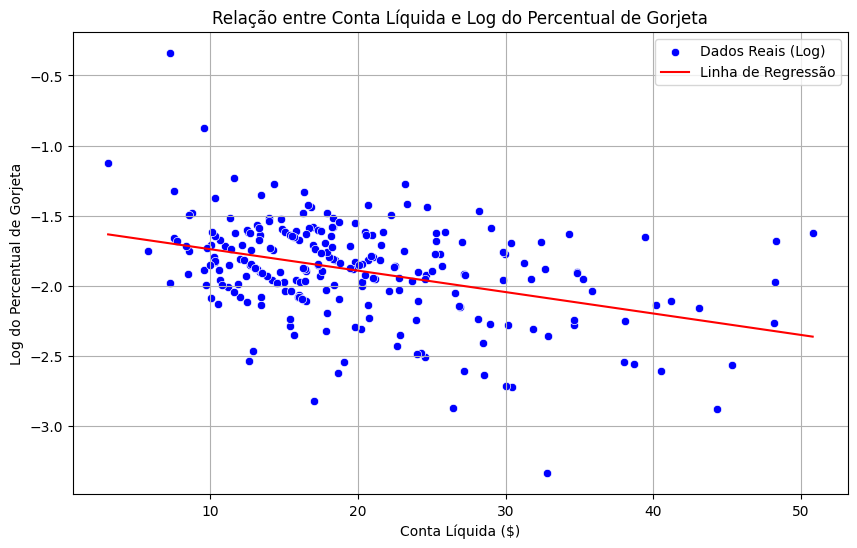

In [12]:
# Importar bibliotecas necessárias
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar a base de dados
tips = sns.load_dataset('tips')

# Criar a variável 'net_bill'
tips['net_bill'] = tips['total_bill']

# Criar a variável 'tip_pct' (percentual de gorjeta)
tips['tip_pct'] = tips['tip'] / tips['total_bill']

# Ajustar o modelo com o log de tip_pct em função de net_bill
tips['log_tip_pct'] = np.log(tips['tip_pct'])

# Criar o modelo de regressão
X_net_bill_log = sm.add_constant(tips['net_bill'])
model_log_tip_pct = sm.OLS(tips['log_tip_pct'], X_net_bill_log).fit()

# Exibir o resumo do modelo
print(model_log_tip_pct.summary())

# Calcular o R² para tip_pct
X_tip_pct = sm.add_constant(tips['net_bill'])
model_tip_pct = sm.OLS(tips['tip_pct'], X_tip_pct).fit()
r_squared_tip_pct = model_tip_pct.rsquared

# Exibir o R² para tip_pct
print(f"\nR² para tip_pct: {r_squared_tip_pct}")

# Gráfico da relação entre net_bill e log_tip_pct
plt.figure(figsize=(10, 6))

# Plotar os dados reais
sns.scatterplot(x=tips['net_bill'], y=tips['log_tip_pct'], color='blue', label='Dados Reais (Log)')

# Plotar a linha de regressão
sns.lineplot(x=tips['net_bill'], y=model_log_tip_pct.predict(X_net_bill_log), color='red', label='Linha de Regressão')

plt.title('Relação entre Conta Líquida e Log do Percentual de Gorjeta')
plt.xlabel('Conta Líquida ($)')
plt.ylabel('Log do Percentual de Gorjeta')
plt.legend()
plt.grid(True)
plt.show()


###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     47.98
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           3.86e-11
Time:                        14:59:49   Log-Likelihood:                -67.677
No. Observations:                 244   AIC:                             139.4
Df Residuals:                     242   BIC:                             146.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.9495      0.137     -6.930   

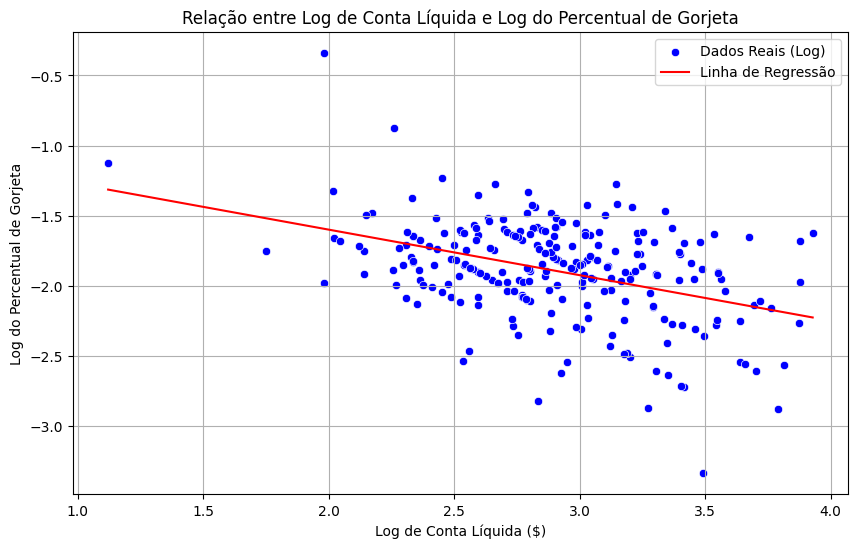

In [13]:
# Criar a variável 'net_bill'
tips['net_bill'] = tips['total_bill']

# Criar a variável 'tip_pct' (percentual de gorjeta)
tips['tip_pct'] = tips['tip'] / tips['total_bill']

# Ajustar o modelo com o log de tip_pct em função do log de net_bill
tips['log_net_bill'] = np.log(tips['net_bill'])
tips['log_tip_pct'] = np.log(tips['tip_pct'])

# Criar o modelo de regressão
X_log_net_bill = sm.add_constant(tips['log_net_bill'])
model_log_log_tip_pct = sm.OLS(tips['log_tip_pct'], X_log_net_bill).fit()

# Exibir o resumo do modelo
print(model_log_log_tip_pct.summary())

# Calcular o R² para tip_pct
X_tip_pct = sm.add_constant(tips['net_bill'])
model_tip_pct = sm.OLS(tips['tip_pct'], X_tip_pct).fit()
r_squared_tip_pct = model_tip_pct.rsquared

# Exibir o R² para tip_pct
print(f"\nR² para tip_pct: {r_squared_tip_pct}")

# Gráfico da relação entre log_net_bill e log_tip_pct
plt.figure(figsize=(10, 6))

# Plotar os dados reais
sns.scatterplot(x=tips['log_net_bill'], y=tips['log_tip_pct'], color='blue', label='Dados Reais (Log)')

# Plotar a linha de regressão
sns.lineplot(x=tips['log_net_bill'], y=model_log_log_tip_pct.predict(X_log_net_bill), color='red', label='Linha de Regressão')

plt.title('Relação entre Log de Conta Líquida e Log do Percentual de Gorjeta')
plt.xlabel('Log de Conta Líquida ($)')
plt.ylabel('Log do Percentual de Gorjeta')
plt.legend()
plt.grid(True)
plt.show()


###  6. qual modelo resultou no melhor ajuste?

# Análise de Regressão sobre Percentual de Gorjetas

## Melhor Modelo
O modelo que apresentou o melhor ajuste foi o **log-log** (logaritmo de `tip_pct` e `net_bill`), com um R² de **0.165**. Esse resultado indica que a relação entre as variáveis é multiplicativa, com o logaritmo capturando melhor as variações.

## Insights Principais

1. **Efeito das Transformações Logarítmicas**:
   A transformação logarítmica revelou uma relação mais estável entre o percentual da gorjeta e o valor da conta, sugerindo que uma mudança percentual na conta afeta o percentual de gorjeta de forma proporcional.

2. **Tendência Decrescente do Percentual de Gorjeta**:
   Conforme o valor da conta aumenta, o percentual de gorjeta tende a diminuir. Isso indica que, em contas maiores, as pessoas oferecem gorjetas proporcionalmente menores.

3. **Efeito de Escala**:
   Um leve ajuste quadrático sugere que o percentual de gorjeta pode se estabilizar ou até aumentar ligeiramente para contas muito altas. No entanto, esse efeito é pequeno.

4. **Possíveis Fatores Omissos**:
   A inclusão de variáveis como sexo, hábito de fumar e horário pode refinar o modelo, capturando variações comportamentais nas gorjetas que foram omitidas na análise atual.

5. **Presença de Outliers**:
   A alta assimetria e curtose nos dados sugerem que outliers podem estar influenciando os resultados. Métodos robustos poderiam ser aplicados para melhorar o ajuste.

## Conclusão
O modelo log-log foi o que melhor ajustou os dados, oferecendo insights valiosos sobre o comportamento do percentual de gorjetas conforme o valor da conta aumenta. Análises mais detalhadas com variáveis adicionais e tratamento de outliers podem aprimorar ainda mais os resultados.
